In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Dataset.zip"
dataset_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [ ]:
!ls /content/dataset

Test  Train  Validation


In [ ]:
!pip install tensorflow opencv-python numpy scikit-learn matplotlib

In [7]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
from google.colab import drive

In [8]:
batch_size = 32
img_size = (128, 128) #256 * 256

In [9]:
train_dataset = image_dataset_from_directory(
    os.path.join(dataset_path, "Train"),
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary')

test_dataset = image_dataset_from_directory(
    os.path.join(dataset_path, "Test"),
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary')

val_dataset = image_dataset_from_directory(
    os.path.join(dataset_path, "Validation"),
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary')

Found 140002 files belonging to 2 classes.
Found 10905 files belonging to 2 classes.
Found 39428 files belonging to 2 classes.


In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=5)

Epoch 1/5
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 5722s 1s/step - accuracy: 0.7385 - loss: 1.3721 - val_accuracy: 0.8256 - val_loss: 0.3752
Epoch 2/5
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 5511s 1s/step - accuracy: 0.8746 - loss: 0.2966 - val_accuracy: 0.8804 - val_loss: 0.2840
Epoch 3/5
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 5421s 1s/step - accuracy: 0.9104 - loss: 0.2229 - val_accuracy: 0.8946 - val_loss: 0.2476
Epoch 4/5
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 5439s 1s/step - accuracy: 0.9214 - loss: 0.1923 - val_accuracy: 0.8994 - val_loss: 0.2455
Epoch 5/5
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 5421s 1s/step - accuracy: 0.9295 - loss: 0.1787 - val_accuracy: 0.9014 - val_loss: 0.2385


In [15]:
# model.save("deepfake_model.h5")
# model.save('deepfake_model.keras')
from google.colab import files
files.download("deepfake_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

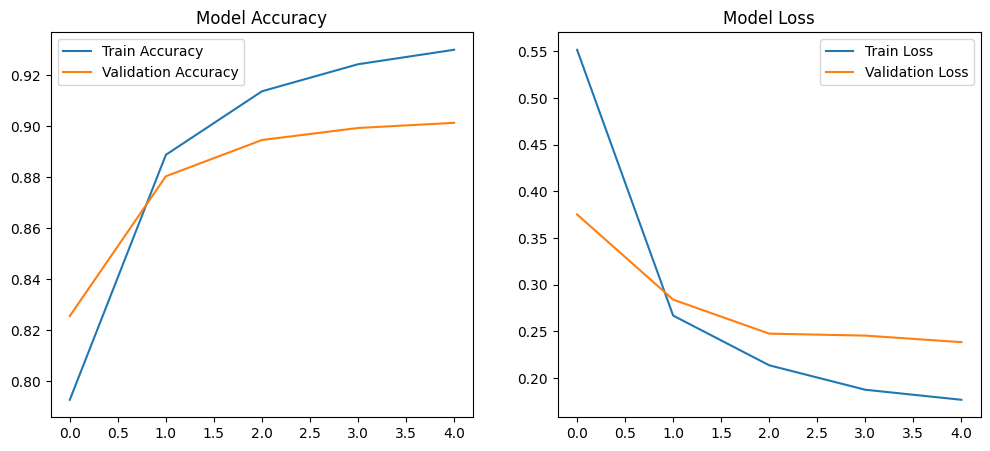

In [16]:
# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

In [18]:
# Load model for prediction
model = tf.keras.models.load_model("deepfake_model.h5")

def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, img_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)[0][0]
    print(f"Confidence: {prediction * 100:.2f}%")
    return "Fake" if prediction > 0.5 else "Real"

# Example Usage
image_path = "/content/dataset/InstagramProfile.png"  # Update this
result = predict_image(image_path)
print(f"Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Confidence: 53.54%
Prediction: Fake
